In [1]:
import u6
from time import sleep
from datetime import datetime

import numpy as np

import matplotlib.pyplot as plt

%pylab inline --no-import-all 
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
# MAX_REQUESTS is the number of packets to be read.
MAX_REQUESTS = 32
#SCAN_FREQ=32768
SCAN_FREQ=16,384
# the number of samples will be MAX_REQUESTS times 48 (packets per request) times 25 (samples per packet).
d = u6.U6()

# Set up U6
d.configU6()
""
# For applying the proper calibration to readings.
d.getCalibrationData()

# Set the FIO0 to Analog
d.configIO()

print "configuring U6 stream"
d.streamConfig( NumChannels = 2, ChannelNumbers=[0,1], ChannelOptions=[0,0],SamplesPerPacket=25, 
              InternalStreamClockFrequency= 0,ScanInterval=1)


configuring U6 stream


In [3]:
def getData():
    data=np.array([],dtype=float)
    try:
       # print "start stream",
        d.streamStart()
        start = datetime.now()
        #print start
        
        missed = 0
        dataCount = 0
        packetCount = 0
    
        for r in d.streamData():
            if r is not None:
                # Our stop condition
                if dataCount >= MAX_REQUESTS:
                    break
                
                if r['errors'] != 0:
                    print "Error: %s ; " % r['errors'], datetime.now()
    
                if r['numPackets'] != d.packetsPerRequest:
                    print "----- UNDERFLOW : %s : " % r['numPackets'], datetime.now()
    
                if r['missed'] != 0:
                    missed += r['missed']
                    print "+++ Missed ", r['missed']
               
                data1=np.append(data,r['AIN0'])
                data2=np.append(data,r['AIN1'])
               
                dataCount += 1
                packetCount += r['numPackets']
            else:
                # Got no data back from our read.
                # This only happens if your stream isn't faster than the 
                # the USB read timeout, ~1 sec.
                print "No data", datetime.now()
    except:
        print "".join(i for i in traceback.format_exc())
    finally:
        stop = datetime.now()
        d.streamStop()
       
    return(data1,data2)

In [3]:
d.close()

NameError: name 'd' is not defined

In [4]:
# setDAC takes a voltage value, converts to 16 bit value, then puts
# outputs voltage to channel 0
def setDAC(Volts):
    bVolts=d.voltageToDACBits(Volts,dacNumber=0,is16Bits=True)
    d.getFeedback(u6.DAC16( 0,  bVolts))
    return

In [5]:
# cycleData creates a table of voltages to output to DAC,
# wait for voltage to settle, and store rms value found at input
# variable rms stores the spectrum and is what is returned

def cycleData(lowV, HighV, numV):
    volts=np.linspace(lowV,HighV,numV)    
    rms=np.array([],dtype=float)
    freq=np.array([],dtype=float)
    for i in volts:
        setDAC(i)
        sleep(.2)
        temp_rms,temp_freq=getData()
        print np.std(temp_rms)
        print np.std(temp_freq)
        rms=np.append(rms,np.std(temp_rms))
        freq=np.append(freq,getFreq(temp_freq,SCAN_FREQ))
        
    return (rms,freq)

In [6]:
# getFreq is used to get start and stop frequency of run,
# since we are not driving an oscillator directly, rather we 
# use a freq. gen. that has a VCO setting, so we need to know what
# frequencies are start and stop voltages correspond to
# later we assume this is linear. Of course this depends on the 
# freq. gen. and ought to be tested.
    
def getFreq(y,Fs):
    
    n = len(y) # length of the signal

    k = np.arange(n)

    T = 1.*n/Fs

    #print T
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range
   
    Y = sp.fft(y)*10. # fft computing and normalization
   
    fig, axes=plt.subplots()
    axes.plot(y)
    return frq[np.argmax(Y[1:n/2])]

In [7]:
def plotData(freq, power):
    fig, axes = plt.subplots(1,1)
    axes.plot(freq, power, label ='Rs')
    axes.set_xlabel('frequency (Hz)')
    axes.set_ylabel('rms voltage (V)')
    axes.legend()

In [8]:
LowV=1.
HighV=4.
numberData=100


In [9]:
setDAC(LowV)
start_FREQ=getFreq(getData(),SCAN_FREQ)
print(start_FREQ)

No data 2015-06-13 08:40:26.144546
No data 2015-06-13 08:40:28.148791
No data 2015-06-13 08:40:30.148728
No data 2015-06-13 08:40:32.150632


IndexError: list index out of range

In [5]:
setDAC(HighV)
end_FREQ=getFreq(getData(1),SCAN_FREQ)
end_FREQ

NameError: name 'setDAC' is not defined

Error: 1 ;  2015-04-15 13:23:09.034690
Error: 1 ;  2015-04-15 13:23:09.035437
Error: 1 ;  2015-04-15 13:23:09.035927
Error: 1 ;  2015-04-15 13:23:09.036467
Error: 1 ;  2015-04-15 13:23:09.037226
Error: 1 ;  2015-04-15 13:23:09.037785
Error: 1 ;  2015-04-15 13:23:09.038715
Error: 1 ;  2015-04-15 13:23:09.039338
Error: 1 ;  2015-04-15 13:23:09.039964
Error: 1 ;  2015-04-15 13:23:09.040851
Error: 1 ;  2015-04-15 13:23:09.041489
Error: 1 ;  2015-04-15 13:23:09.042112
Error: 1 ;  2015-04-15 13:23:09.043004
Error: 1 ;  2015-04-15 13:23:09.043952
Error: 1 ;  2015-04-15 13:23:09.044541
Error: 1 ;  2015-04-15 13:23:09.045055
Error: 1 ;  2015-04-15 13:23:09.045721
Error: 1 ;  2015-04-15 13:23:09.046439
Error: 1 ;  2015-04-15 13:23:09.047114
Error: 1 ;  2015-04-15 13:23:09.047881
Error: 1 ;  2015-04-15 13:23:09.048476
Error: 1 ;  2015-04-15 13:23:09.049186
Error: 1 ;  2015-04-15 13:23:09.049968
Error: 1 ;  2015-04-15 13:23:09.050671
Error: 1 ;  2015-04-15 13:23:09.051424
Error: 1 ;  2015-04-15 13

ValueError: attempt to get argmax of an empty sequence

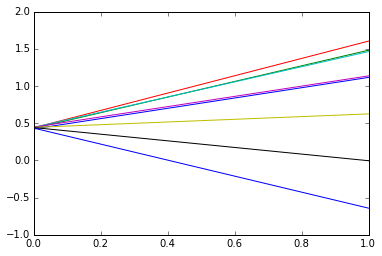

In [45]:
getFreq(getData(),SCAN_FREQ)


Error: 1 ;  2015-04-15 13:22:07.387527
Error: 1 ;  2015-04-15 13:22:07.388568
Error: 1 ;  2015-04-15 13:22:07.389425
Error: 1 ;  2015-04-15 13:22:07.390322
Error: 1 ;  2015-04-15 13:22:07.391232
Error: 1 ;  2015-04-15 13:22:07.392260
Error: 1 ;  2015-04-15 13:22:07.393030
Error: 1 ;  2015-04-15 13:22:07.393817
Error: 1 ;  2015-04-15 13:22:07.394590
Error: 1 ;  2015-04-15 13:22:07.395327
Error: 1 ;  2015-04-15 13:22:07.395948
Error: 1 ;  2015-04-15 13:22:07.396667
Error: 1 ;  2015-04-15 13:22:07.397429
Error: 1 ;  2015-04-15 13:22:07.398154
Error: 1 ;  2015-04-15 13:22:07.398901
Error: 1 ;  2015-04-15 13:22:07.399653
Error: 1 ;  2015-04-15 13:22:07.400321
Error: 1 ;  2015-04-15 13:22:07.401008
Error: 1 ;  2015-04-15 13:22:07.402020
Error: 1 ;  2015-04-15 13:22:07.402608
Error: 1 ;  2015-04-15 13:22:07.403518
Error: 1 ;  2015-04-15 13:22:07.404072
Error: 1 ;  2015-04-15 13:22:07.404975
Error: 1 ;  2015-04-15 13:22:07.405537
Error: 1 ;  2015-04-15 13:22:07.406663
Error: 1 ;  2015-04-15 13

array([    0.,     0.,  4096.,  4096.,  4096.,  4096.,  8192.,     0.,
           0.,  8192.])

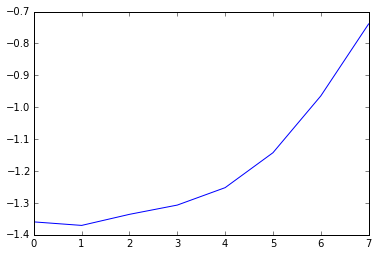

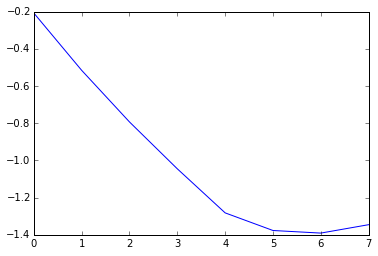

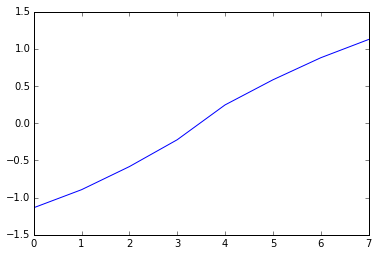

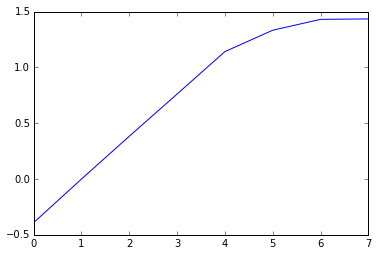

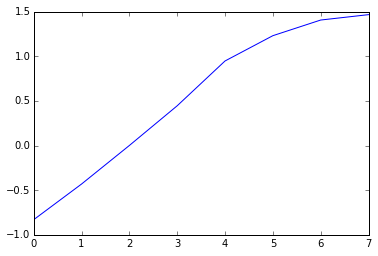

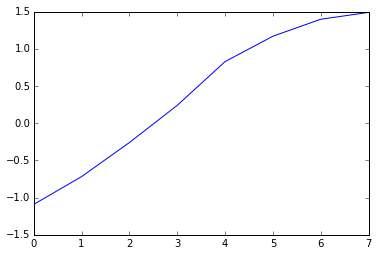

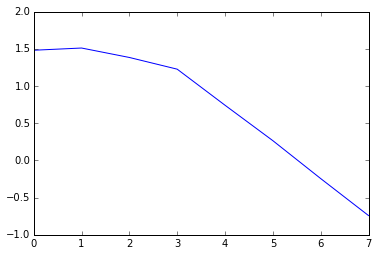

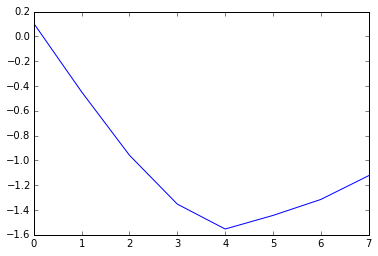

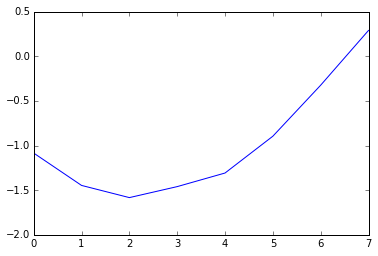

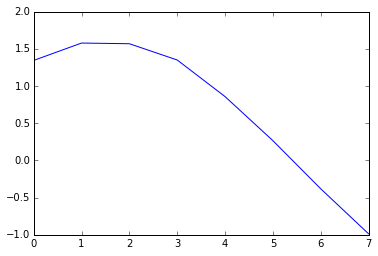

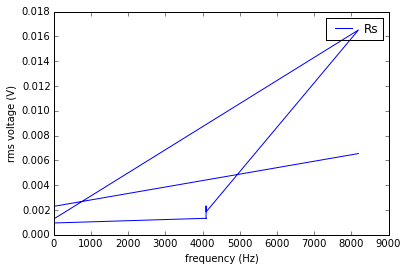

In [40]:
#take spectrum
spectrum,freq=cycleData(LowV, HighV, 10)
plotData(freq,spectrum)
freq


In [68]:
data_out=np.column_stack((freq[:,np.newaxis],spectrum[:,np.newaxis]))
np.savetxt('test.out', data_out, delimiter=',')

NameError: name 'freq' is not defined

In [10]:
d.close()


In [41]:
freq

array([    0.,     0.,  4096.,  4096.,  4096.,  4096.,  8192.,     0.,
           0.,  8192.])

In [42]:
spectrum

array([ 0.00112141,  0.00095315,  0.0013305 ,  0.00130209,  0.00231933,
        0.00184439,  0.01651823,  0.00127304,  0.0022923 ,  0.00655244])

In [43]:
freq

array([    0.,     0.,  4096.,  4096.,  4096.,  4096.,  8192.,     0.,
           0.,  8192.])